# 🔍 Decode the Secret Image (NumPy + Matplotlib)
This notebook walks step-by-step through loading an encoded NumPy array, reshaping it into a square image, fixing its orientation, and displaying the final result.

## 1) Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)
%matplotlib inline

## 2) Load the encoded array

In [6]:
arr = np.load(r"encoded_array.npy")
print("Loaded shape:", arr.shape)
print("Total elements:", arr.size)

Loaded shape: (200, 50)
Total elements: 10000


## 3) Compute the square size and reshape
We flatten first to ensure a consistent layout, then reshape to **n × n**.

Square size n = 100


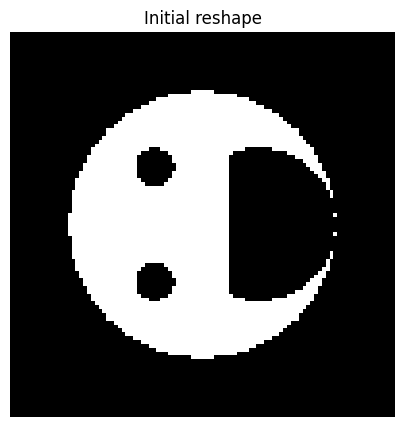

In [7]:
n = int(np.sqrt(arr.size))
assert n*n == arr.size, 'Total elements are not a perfect square.'
img0 = arr.ravel().reshape(n, n)
print('Square size n =', n)
plt.imshow(img0, cmap='gray'); plt.axis('off'); plt.title('Initial reshape');

## 4) Explore orientations
The *structure may be upright, but the data might be sideways*. We'll try common transforms.

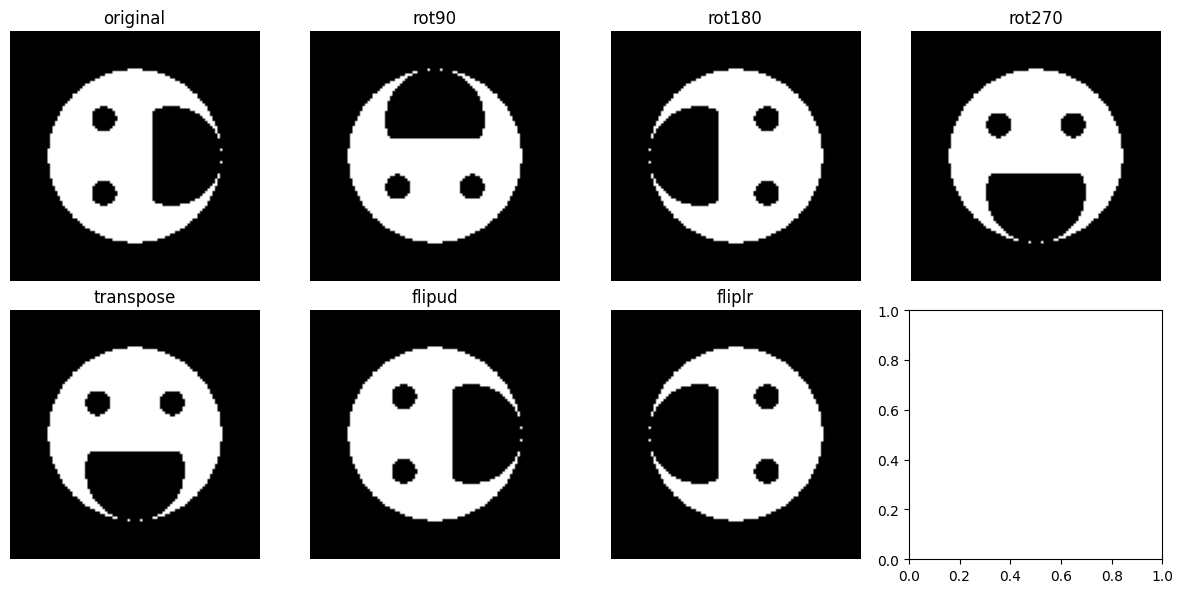

In [8]:
variants = {
    'original': img0,
    'rot90': np.rot90(img0),
    'rot180': np.rot90(img0, 2),
    'rot270': np.rot90(img0, 3),
    'transpose': img0.T,
    'flipud': np.flipud(img0),
    'fliplr': np.fliplr(img0)
}

fig, axes = plt.subplots(2, 4, figsize=(12,6))
for ax, (name, img) in zip(axes.flat, variants.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(name)
    ax.axis('off')
plt.tight_layout()

## 5) Apply the final transform
Based on the visuals, the correct orientation is the one that looks upright. Here we select `rot270` (90° clockwise) as the final image.

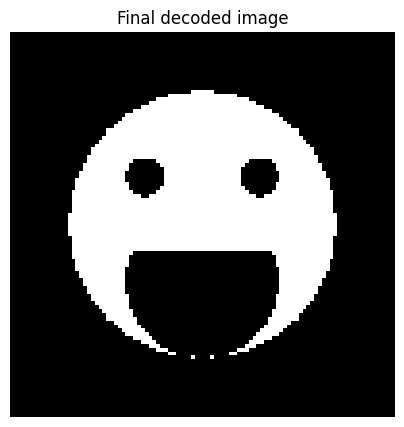

In [9]:
final_img = np.rot90(img0, 3)
plt.imshow(final_img, cmap='gray'); plt.axis('off'); plt.title('Final decoded image');

## 6) Save the final image to disk

In [11]:
import imageio.v2 as imageio
imageio.imwrite(r'secret_image.png', (final_img * 255).astype(np.uint8))
print('Saved:', r'secret_image.png')

Saved: secret_image.png
